In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)

In [89]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [90]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [91]:
df.shape

(102599, 26)

In [92]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [93]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [94]:
dtypes_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

In [95]:
dtypes_df

,Data Type,Non-Null Count,Null Count,Null Percentage
id,int64,102599,0,0.00
NAME,object,102349,250,0.24
host id,int64,102599,0,0.00
host_identity_verified,object,102310,289,0.28
host name,object,102193,406,0.40
neighbourhood group,object,102570,29,0.03
neighbourhood,object,102583,16,0.02
lat,float64,102591,8,0.01
long,float64,102591,8,0.01
country,object,102067,532,0.52


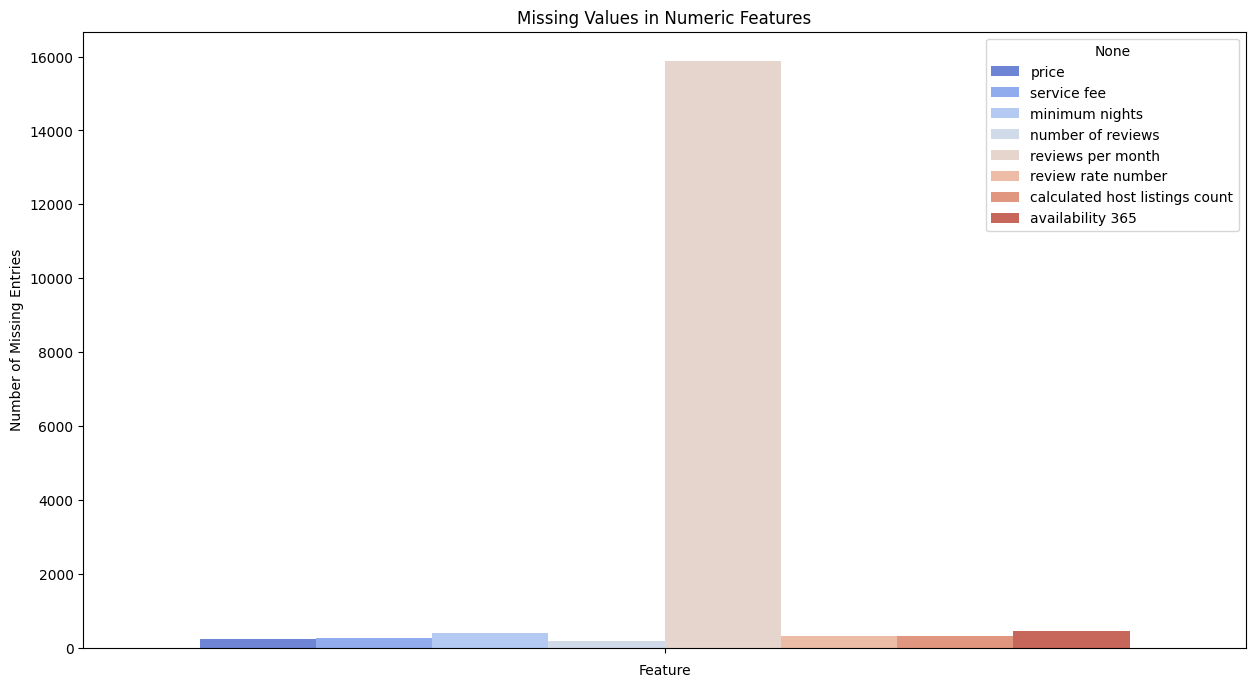

In [96]:
numeric_cols = ['price', 'service fee', 'minimum nights', 'number of reviews',
                'reviews per month', 'review rate number',
                'calculated host listings count', 'availability 365']
def drop_high_missing_columns(df, threshold=0.5):
    missing_percentage = df.isnull().mean()  
    cols_to_drop = missing_percentage[missing_percentage > threshold].index 
    return df.drop(columns=cols_to_drop)

df = drop_high_missing_columns(df)  

missing = df[numeric_cols].isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(15, 8))
sns.barplot(hue=missing.index, y=missing.values, palette="coolwarm")
plt.title("Missing Values in Numeric Features")
plt.ylabel("Number of Missing Entries")
plt.xlabel("Feature")
plt.show()


In [97]:

df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)

df = df[df['price'] < 1000]


<Figure size 1400x1000 with 0 Axes>

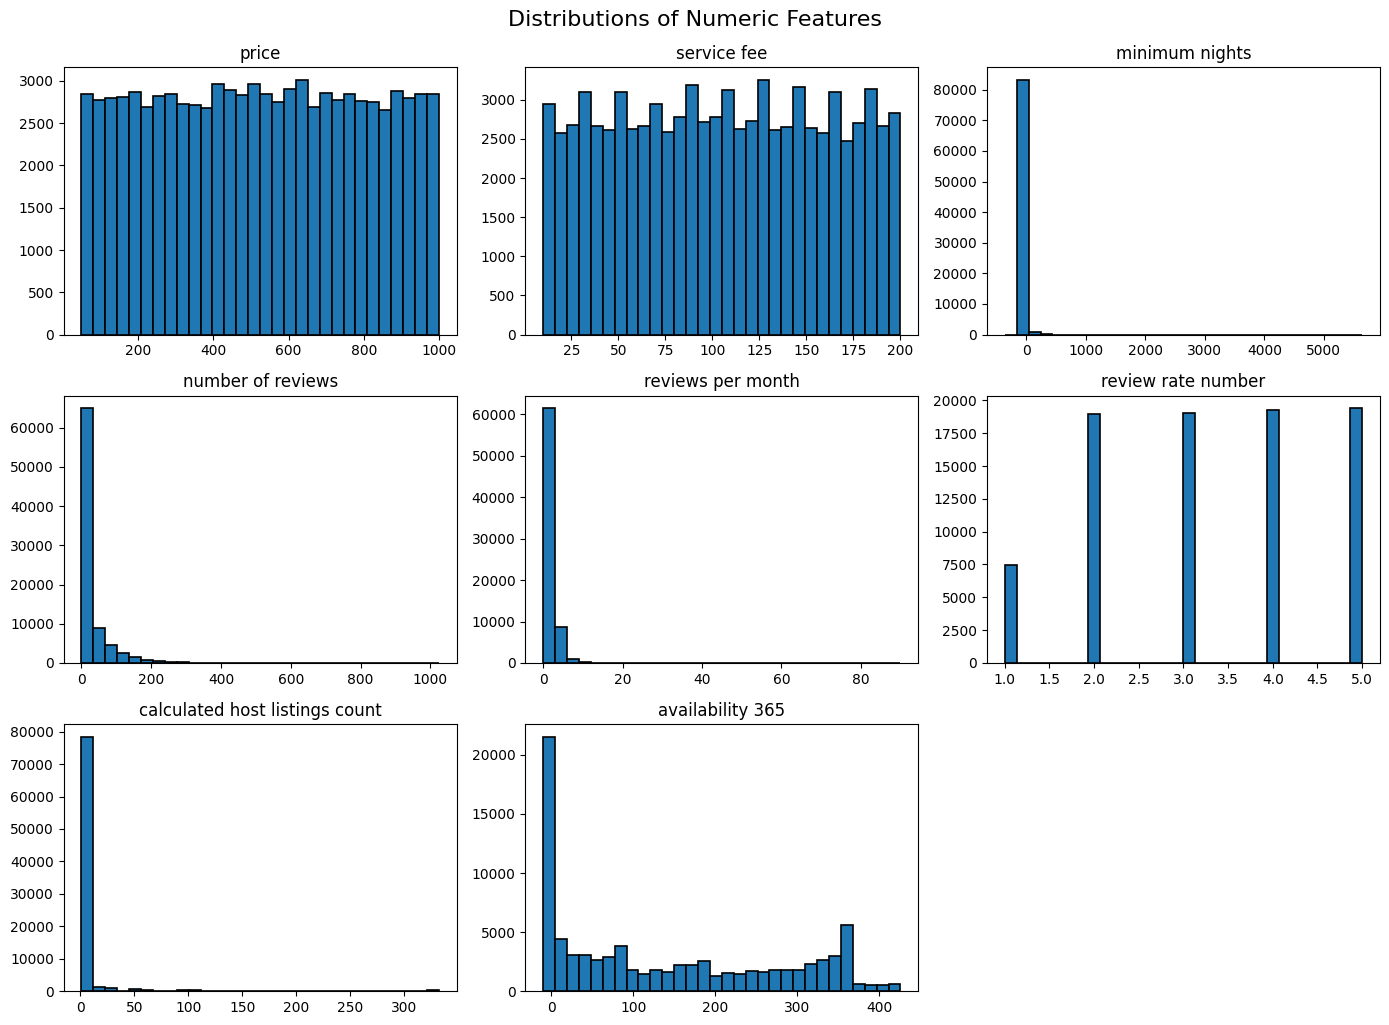

In [98]:

plt.figure(figsize=(14, 10))
df[numeric_cols].hist(bins=30, edgecolor='black', linewidth=1.2, grid=False, layout=(3, 3), figsize=(14, 10))
plt.tight_layout()
plt.suptitle('Distributions of Numeric Features', fontsize=16, y=1.02)
plt.show()


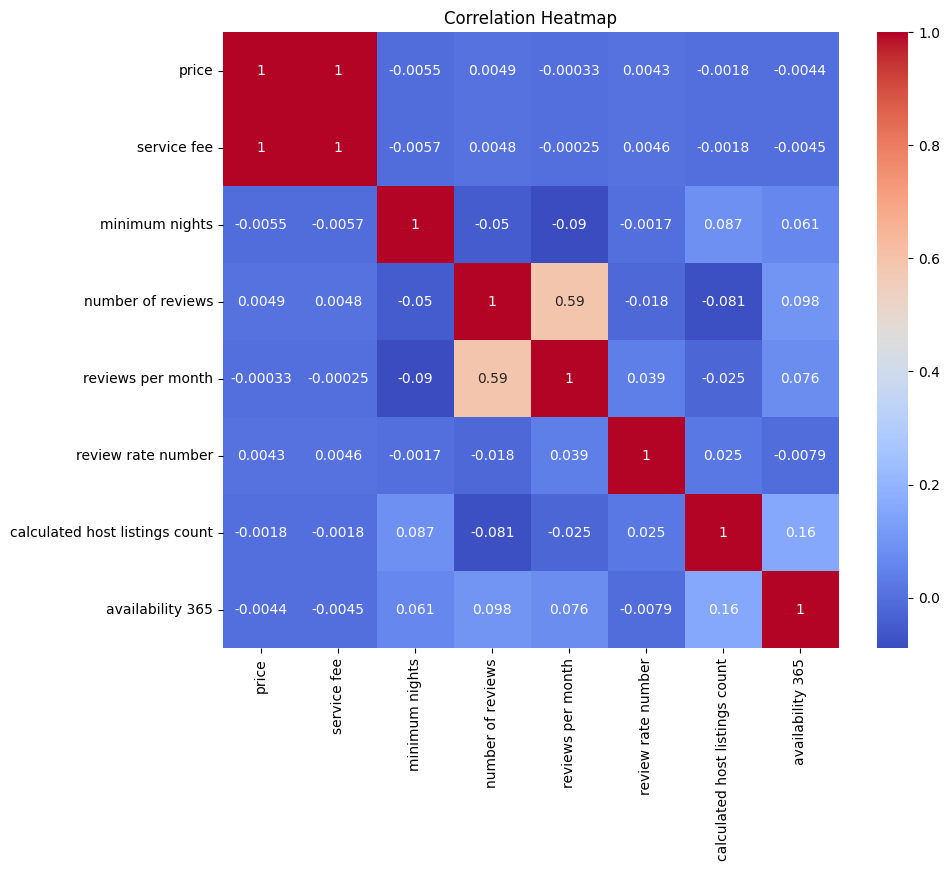

In [99]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

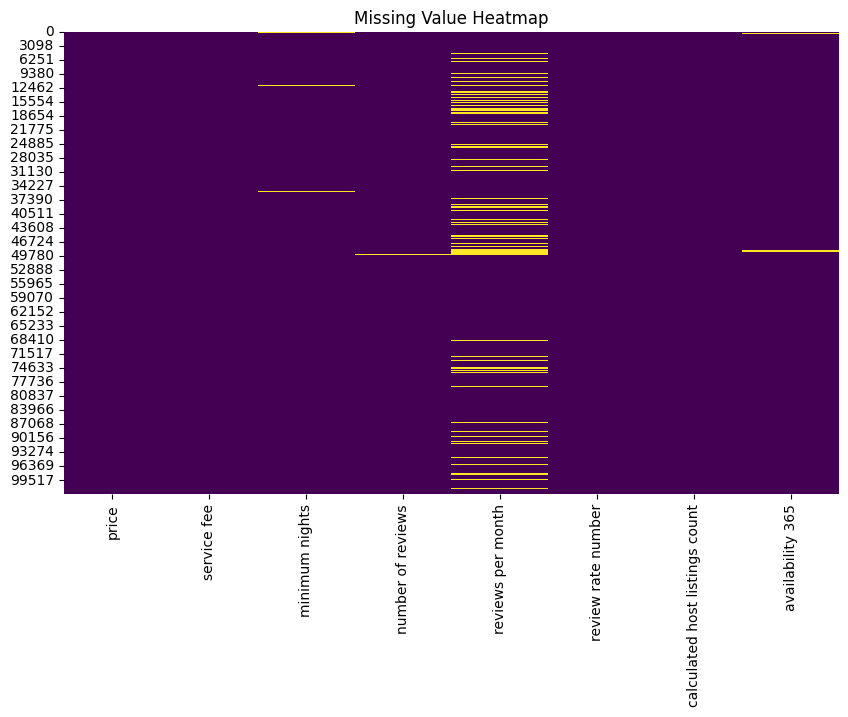

In [100]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


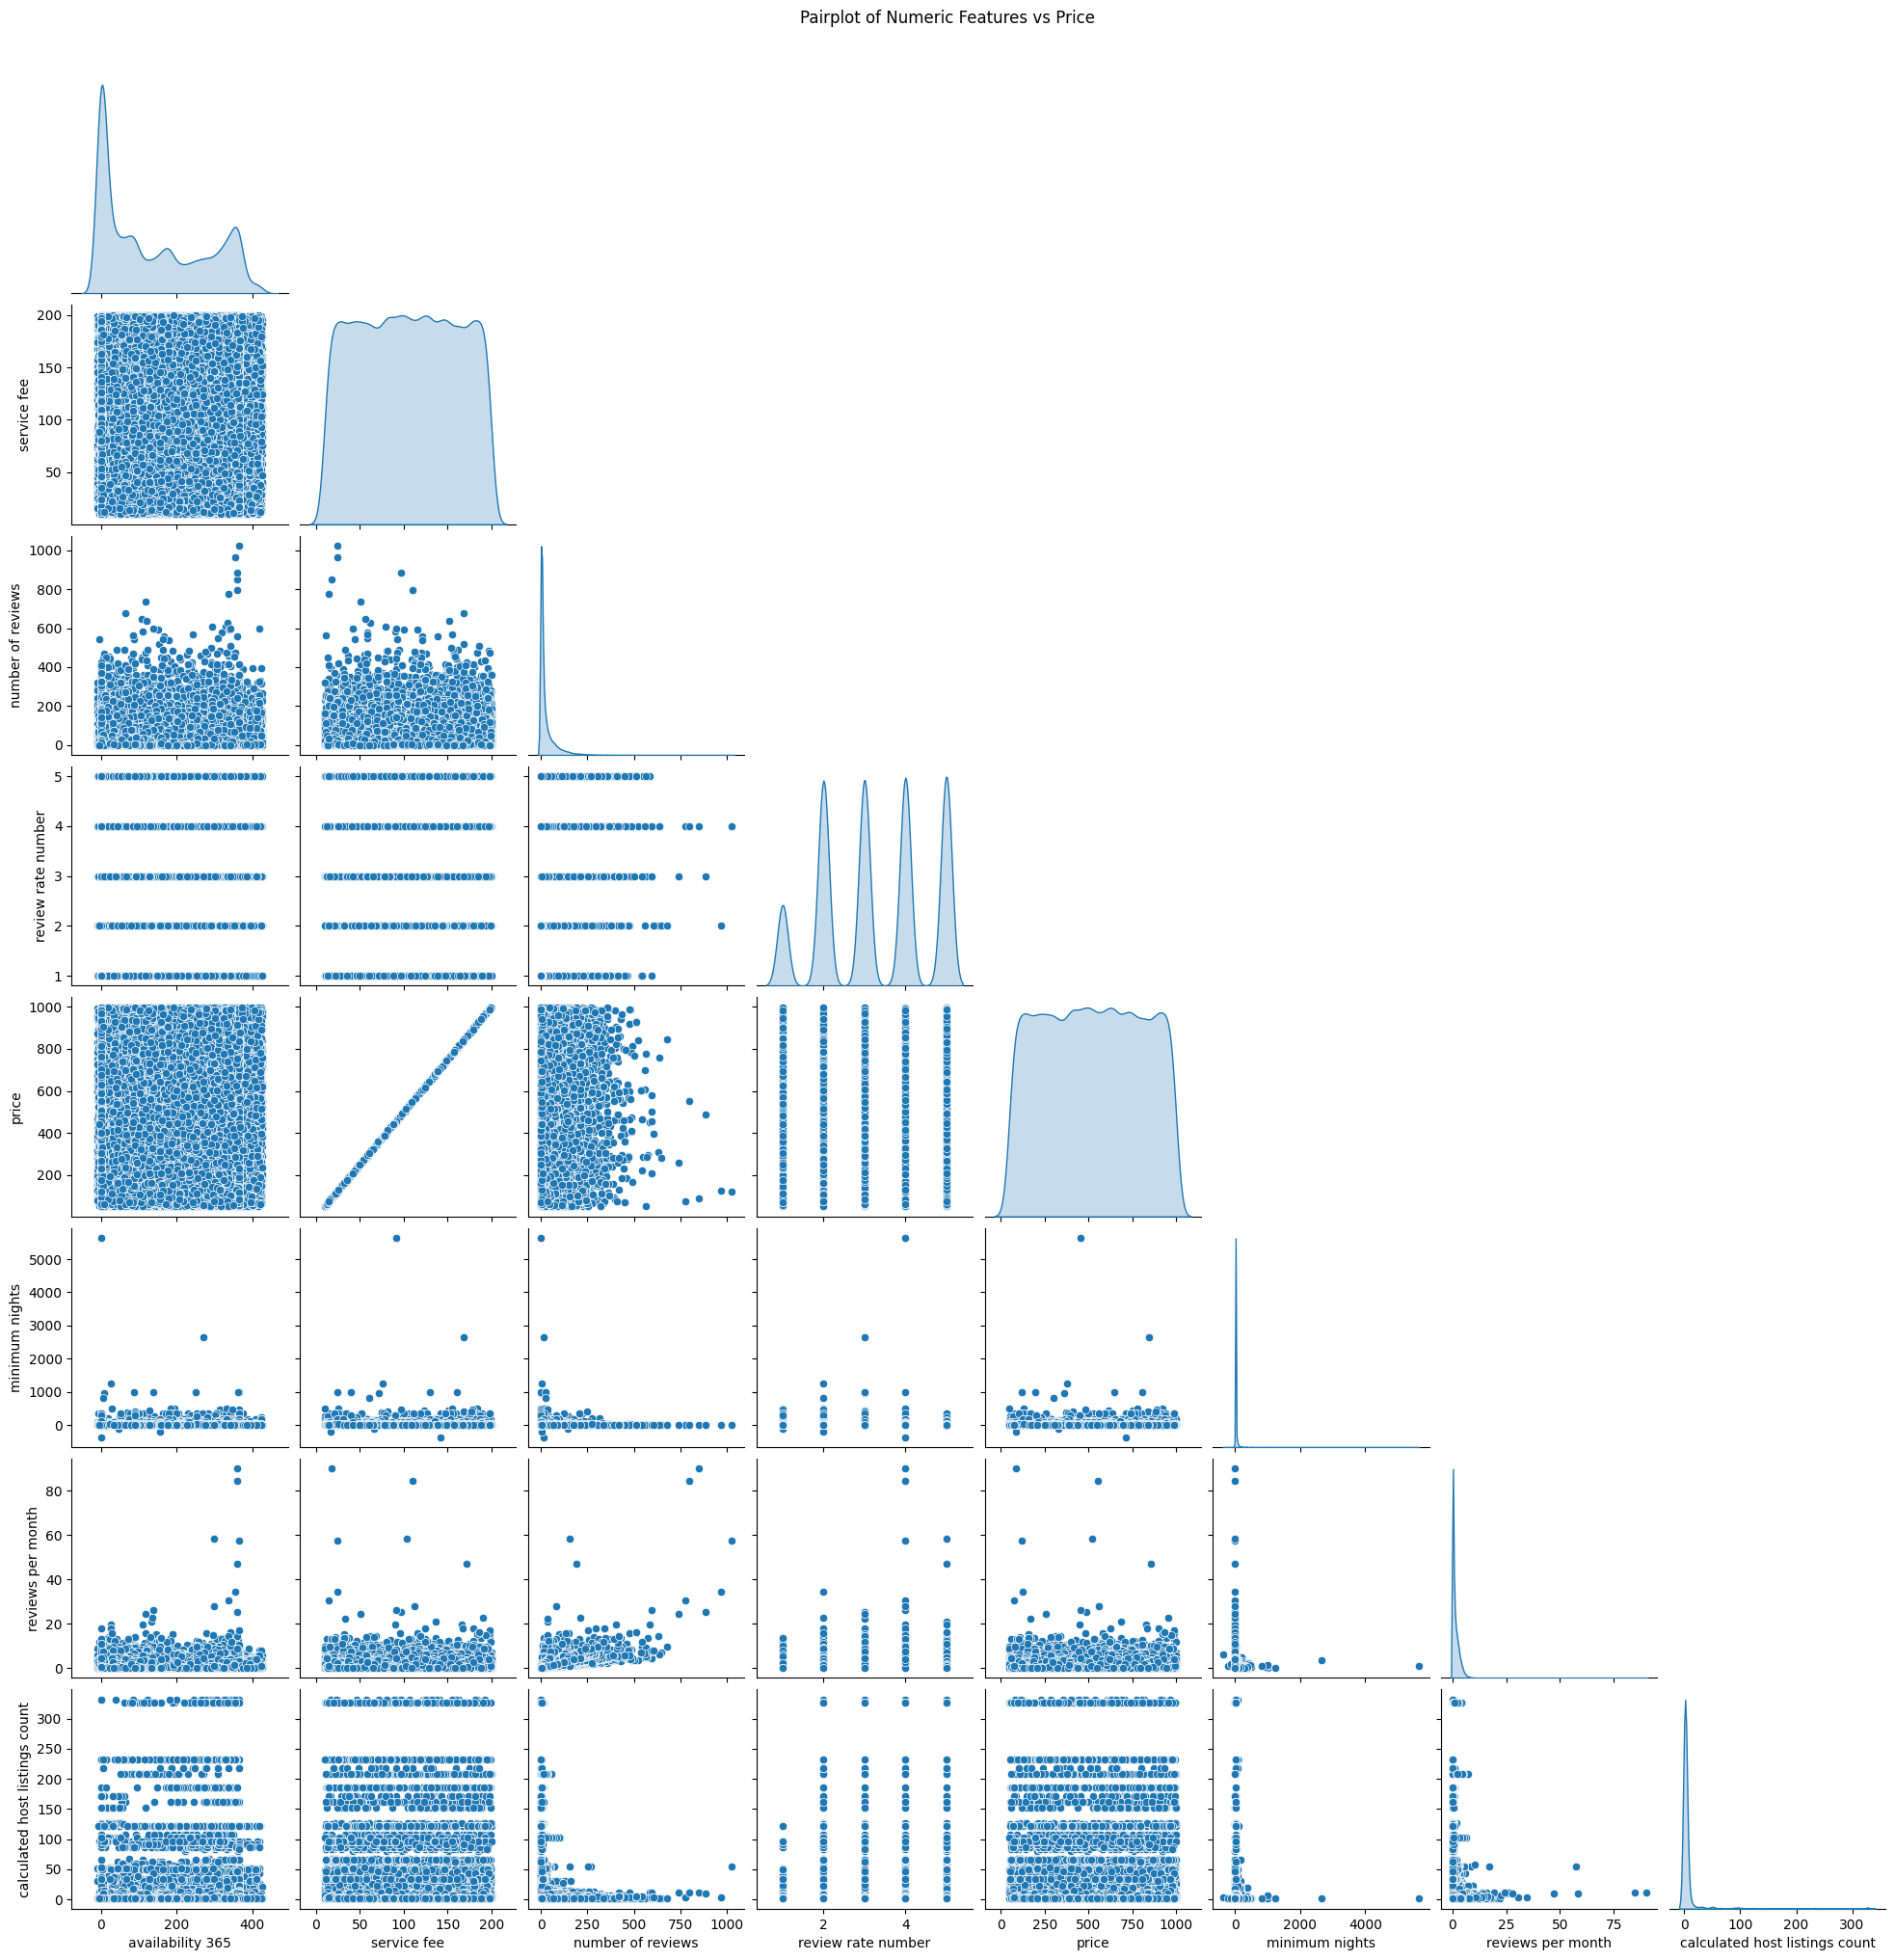

In [101]:
features_to_plot = list(set(numeric_cols))
sns.pairplot(df[features_to_plot], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Numeric Features vs Price", y=1.02)
plt.show()

In [102]:
df.drop(columns=['country','country code','id','host id','NAME', 'host name'],inplace= True)

In [103]:
df.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [104]:
df.isna().sum()

host_identity_verified              234
neighbourhood group                  23
neighbourhood                        13
lat                                   7
long                                  7
instant_bookable                     84
cancellation_policy                  59
room type                             0
Construction year                   180
price                                 0
service fee                         186
minimum nights                      342
number of reviews                   163
last review                       13151
reviews per month                 13141
review rate number                  271
calculated host listings count      267
availability 365                    373
dtype: int64

In [105]:
df.fillna({
    'host_identity_verified': 'Unknown',
    'NAME':'Apartment in ' + df['neighbourhood'],
    'host name': 'Anonymous',
    'neighbourhood group': df['neighbourhood group'].mode()[0],
    'neighbourhood': df['neighbourhood'].mode()[0],
    'lat': df['lat'].median(),
    'long': df['long'].median(),
    'instant_bookable': 'Unknown',
    'cancellation_policy': df['cancellation_policy'].mode()[0],
    'Construction year': df['Construction year'].median(),
    'price': df['price'].median(),
    'service fee': df['service fee'].median(),
    'minimum nights': df['minimum nights'].median(),
    'number of reviews': df['number of reviews'].median(),
    'last review': 0,
    'reviews per month': 0,
    'review rate number': df['review rate number'].median(),
    'calculated host listings count': df['calculated host listings count'].mode()[0],
    'availability 365': 0
}, inplace=True)


In [106]:
df.isna().sum()

host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

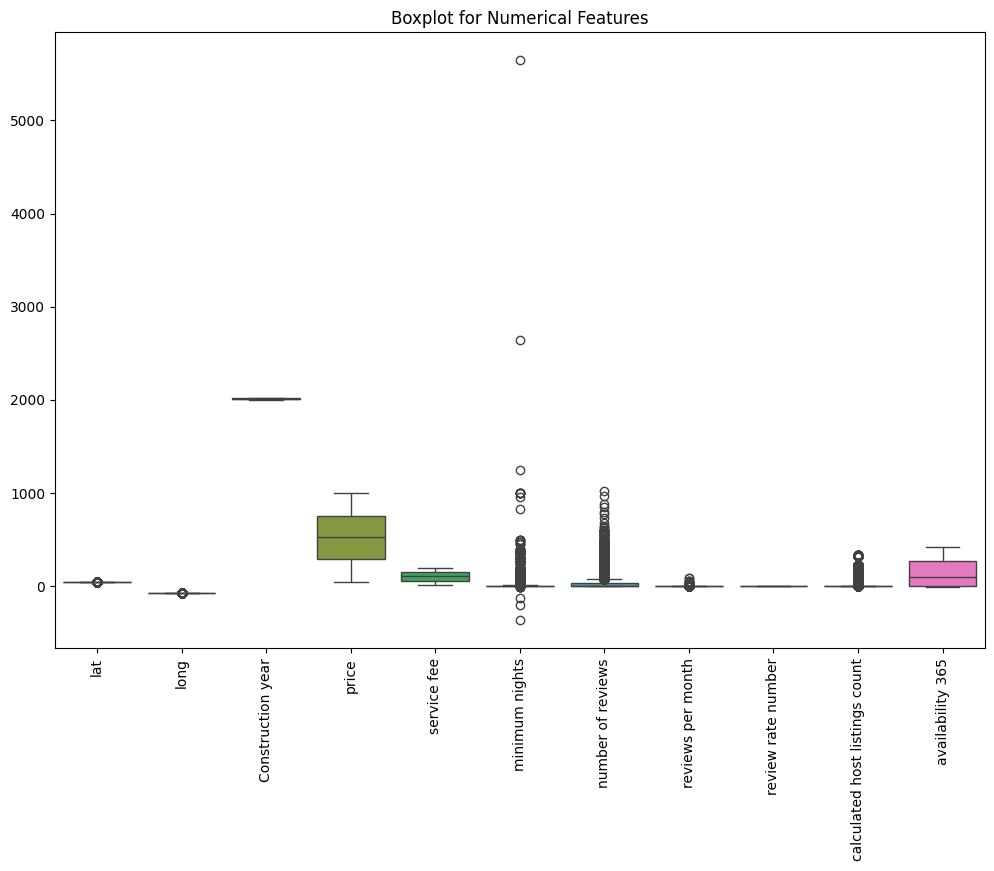

In [107]:
plt.figure(figsize=(12, 8))  
sns.boxplot(data=df.select_dtypes(exclude='object'))  
plt.xticks(rotation=90)  
plt.title("Boxplot for Numerical Features")  
plt.show()  

In [108]:
df.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,Unknown,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,0,0.00,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [109]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_features = df.select_dtypes(exclude=['object'])
df= remove_outliers_iqr(df, numerical_features)


In [110]:
df.select_dtypes(include=['object']).nunique()

host_identity_verified       3
neighbourhood group          4
neighbourhood              125
instant_bookable             3
cancellation_policy          3
room type                    4
last review               2133
dtype: int64

In [111]:
df = df.drop_duplicates()

In [112]:
df.select_dtypes(include=['object']).nunique()

host_identity_verified       3
neighbourhood group          4
neighbourhood              125
instant_bookable             3
cancellation_policy          3
room type                    4
last review               2133
dtype: int64

In [113]:
le = LabelEncoder()
df['host_identity_verified'] = df['host_identity_verified'].map({
    'verified': 1,  
    'unconfirmed': 0,  
    'unknown': -1  
})
df['instant_bookable'] = df['instant_bookable'].map({True: 't', False: 'f'})


df['host_identity_verified'] = le.fit_transform(df['host_identity_verified'])
df['instant_bookable'] = le.fit_transform(df['instant_bookable'])
df['cancellation_policy'] = le.fit_transform(df['cancellation_policy'])
df['room type'] = le.fit_transform(df['room type'])

neighbourhood_counts = df['neighbourhood'].value_counts() / len(df)
df['neighbourhood'] = df['neighbourhood'].map(neighbourhood_counts)

df = pd.get_dummies(df, columns=['neighbourhood group'], drop_first=True)

df['last review'] = pd.to_datetime(df['last review'], errors='coerce') 
current_date = pd.to_datetime('today')
df['days_since_last_review'] = (current_date - df['last review']).dt.days



In [114]:
df.drop(columns=['last review'],inplace = True)

In [115]:
df.head()

,host_identity_verified,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,days_since_last_review
2,2,0.061549,40.80902,-73.94190,1,0,2,2005.0,620.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0,False,True,False,20199
5,1,0.006303,40.74767,-73.97500,1,0,0,2013.0,577.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0,False,True,False,2130
11,1,0.040371,40.80316,-73.96545,1,0,0,2008.0,606.0,121.0,5.0,53.0,0.43,4.0,1.0,163.0,False,True,False,2130
20,1,0.023948,40.79685,-73.94872,2,1,0,2013.0,281.0,56.0,7.0,0.0,0.00,3.0,2.0,347.0,False,True,False,20199
21,1,0.096838,40.71842,-73.95718,2,0,0,2016.0,477.0,95.0,3.0,9.0,0.07,3.0,1.0,193.0,True,False,False,1210


In [116]:
x=df.drop(columns=['price'])
y= df['price']

In [117]:
x.drop_duplicates()

,host_identity_verified,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,days_since_last_review
2,2,0.061549,40.80902,-73.94190,1,0,2,2005.0,124.0,3.0,0.0,0.00,5.0,1.0,352.0,False,True,False,20199
5,1,0.006303,40.74767,-73.97500,1,0,0,2013.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0,False,True,False,2130
11,1,0.040371,40.80316,-73.96545,1,0,0,2008.0,121.0,5.0,53.0,0.43,4.0,1.0,163.0,False,True,False,2130
20,1,0.023948,40.79685,-73.94872,2,1,0,2013.0,56.0,7.0,0.0,0.00,3.0,2.0,347.0,False,True,False,20199
21,1,0.096838,40.71842,-73.95718,2,0,0,2016.0,95.0,3.0,9.0,0.07,3.0,1.0,193.0,True,False,False,1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102051,1,0.005125,40.66130,-73.89088,1,1,2,2012.0,105.0,1.0,0.0,0.00,4.0,1.0,88.0,True,False,False,20199
102053,0,0.015049,40.64945,-73.96108,1,1,2,2012.0,105.0,7.0,12.0,0.44,5.0,1.0,0.0,True,False,False,2217
102054,1,0.054024,40.69872,-73.92718,0,0,2,2012.0,105.0,1.0,19.0,0.72,3.0,2.0,0.0,True,False,False,2790
102055,1,0.081091,40.67810,-73.90822,1,1,0,2012.0,105.0,2.0,50.0,3.12,4.0,2.0,235.0,True,False,False,2126


In [118]:
model_features = [
    'lat', 'long', 'Construction year', 'service fee', 'minimum nights',
    'number of reviews', 'reviews per month', 'review rate number',
    'calculated host listings count', 'availability 365'  # ← only 10!
]

scaler = MinMaxScaler()
df[model_features] = scaler.fit_transform(df[model_features])


In [119]:
x['price'] = y

correlation_matrix = df.corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)

top_10_correlated = price_correlation.iloc[1:11]

In [120]:
top_10_correlated

service fee                       0.999142
number of reviews                 0.007007
review rate number                0.006699
room type                         0.006108
long                              0.004411
neighbourhood                     0.003969
calculated host listings count    0.003811
instant_bookable                  0.002133
neighbourhood group_Brooklyn      0.001791
host_identity_verified            0.001603
Name: price, dtype: float64

In [121]:
X = df.drop(columns=['price'])
y = df['price']

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X, y)

ranking = rfe.ranking_

selected_features = X.columns[rfe.support_]

print("Top 10 features selected by RFE:")
print(selected_features)

Top 10 features selected by RFE:
Index(['neighbourhood', 'lat', 'instant_bookable', 'service fee',
       'minimum nights', 'number of reviews', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'neighbourhood group_Brooklyn'],
      dtype='object')


In [122]:

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 9581.1682
R² Score: 0.8701


In [123]:

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [50, 75],
    'max_depth': [3, 5],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['log2', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_train_pred = best_rf.predict(X_train)

print("\n🏆 Best Hyperparameters:", random_search.best_params_)

print("\n📊 Evaluation on Test Set:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

print("\n📊 Evaluation on Training Set:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"R² Score: {r2_score(y_train, y_train_pred):.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=75; total time=   0.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=75; total 

In [124]:
X_train.shape

(36680, 10)

In [125]:
y_train_pred = rf_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")

Training Mean Squared Error: 9727.7671
Training R² Score: 0.8702


In [126]:
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(0.05, input_shape=(X_train.shape[1],)),  
    tf.keras.layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Epoch 1/20


/Users/kiran/.pyenv/versions/3.11.8/lib/python3.11/site-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1147/1147 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - loss: 348225.9375 - mae: 523.1279 - val_loss: 302678.9688 - val_mae: 479.9734
Epoch 2/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 269995.8750 - mae: 445.0461 - val_loss: 139270.2500 - val_mae: 305.6334
Epoch 3/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 132145.9062 - mae: 295.1987 - val_loss: 73209.3594 - val_mae: 226.5824
Epoch 4/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 103660.8594 - mae: 261.9937 - val_loss: 64282.4570 - val_mae: 213.4196
Epoch 5/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 96337.5312 - mae: 251.7276 - val_loss: 57779.2109 - val_mae: 202.7706
Epoch 6/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 91509.8516 - mae: 242.9450 - val_loss: 50833.3398 - val_mae: 190.5970
Epoch 7/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 84097.4297 - mae: 233.8856 - val_loss: 44151.8945 - val_mae: 177.7675
Epoch 8/20
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 792

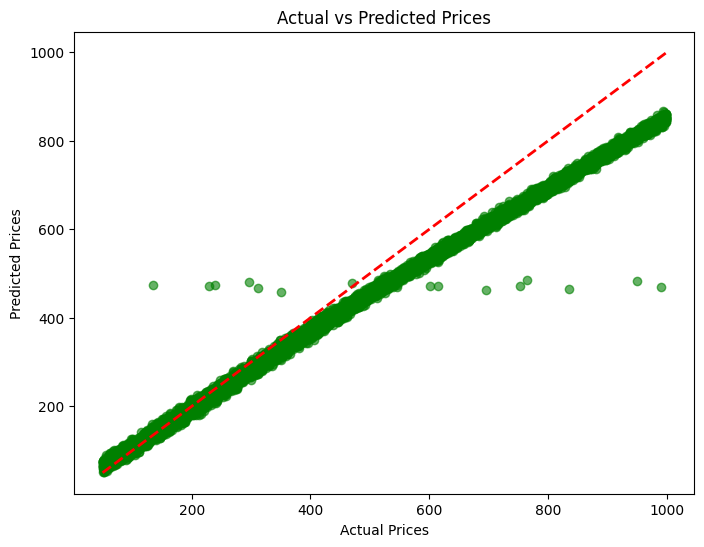

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [128]:
import joblib
model.save("model.h5")
joblib.dump(scaler, "scaler.pkl")
print("✅ Saved model to 'model.h5' and scaler to 'scaler.pkl'")

✅ Saved model to 'model.h5' and scaler to 'scaler.pkl'
